In [1]:
%matplotlib inline
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import glob
import re
import pandas as pd
from IPython.display import display, Markdown
from keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 50)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Using TensorFlow backend.


In [2]:
model_path = 'results/53-oxford-resnet-2-10-01/model'
data_path = 'dataset/7. oxford-normalized-10/'
param_files = sorted(glob.glob(model_path + '/*/'))
print(param_files)

['results/53-oxford-resnet-2-10-01/model\\2018-03-13-08-47-59\\', 'results/53-oxford-resnet-2-10-01/model\\2018-03-13-09-06-11\\', 'results/53-oxford-resnet-2-10-01/model\\2018-03-13-09-59-05\\', 'results/53-oxford-resnet-2-10-01/model\\2018-03-13-10-05-50\\', 'results/53-oxford-resnet-2-10-01/model\\2018-03-13-11-21-41\\', 'results/53-oxford-resnet-2-10-01/model\\2018-03-13-16-34-26\\', 'results/53-oxford-resnet-2-10-01/model\\2018-03-13-17-34-20\\', 'results/53-oxford-resnet-2-10-01/model\\2018-03-13-21-46-33\\', 'results/53-oxford-resnet-2-10-01/model\\2018-03-13-22-15-26\\', 'results/53-oxford-resnet-2-10-01/model\\2018-03-14-03-13-44\\']


In [3]:
# Load datasets
x_train = pickle.load(open(data_path + "x_train.p", "rb"))
y_train = pickle.load(open(data_path + "y_train.p", "rb"))
x_test = pickle.load(open(data_path + "x_test.p", "rb"))
y_test = pickle.load(open(data_path + "y_test.p", "rb"))

In [4]:
# Get minimum or maximum point in a dataframe
def get_row_extreme(df, col, maximum):
    if (maximum):
        index = df[col].idxmax()
    else:
        index = df[col].idxmin()
    row = df.iloc[index]
    return row

# Highlight max/min points
def highlight_extreme(df, col, plt, maximum):
    row = get_row_extreme(df, col, maximum)
    plt.plot(row['epoch'], row[col], 'o')
    return row[col]

***

results/53-oxford-resnet-2-10-01/model\2018-03-13-08-47-59\weights.hdf5


,0
Autoencoder 1,results/51-oxford-autoencoder-1-10-01/model/2018-03-13-06-45-53/weights.hdf5
Autoencoder 2,results/52-oxford-autoencoder-2-10-01/model/2018-03-13-08-06-29/weights.hdf5
Batch size,20
Dataset,Oxford
Decay,1e-05
Dropout all,0.5
Epochs,100000
Fine tune,True
Layer 1,128
Layer 2,0


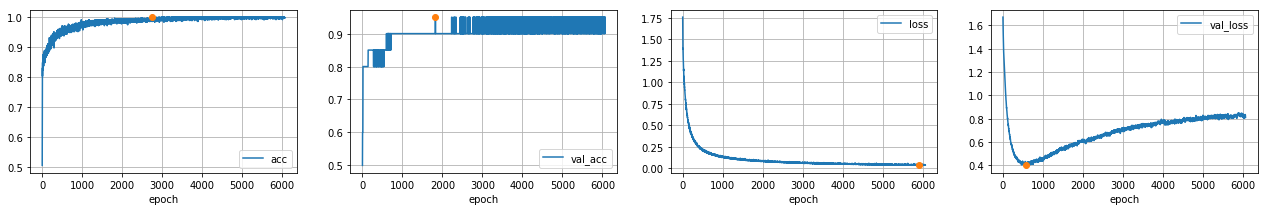

Could not load model weights


***

results/53-oxford-resnet-2-10-01/model\2018-03-13-09-06-11\weights.hdf5


,0
Autoencoder 1,results/51-oxford-autoencoder-1-10-01/model/2018-03-13-06-45-53/weights.hdf5
Autoencoder 2,results/52-oxford-autoencoder-2-10-01/model/2018-03-13-08-06-29/weights.hdf5
Batch size,20
Dataset,Oxford
Decay,1e-05
Dropout all,0.5
Epochs,100000
Fine tune,True
Layer 1,128
Layer 2,0


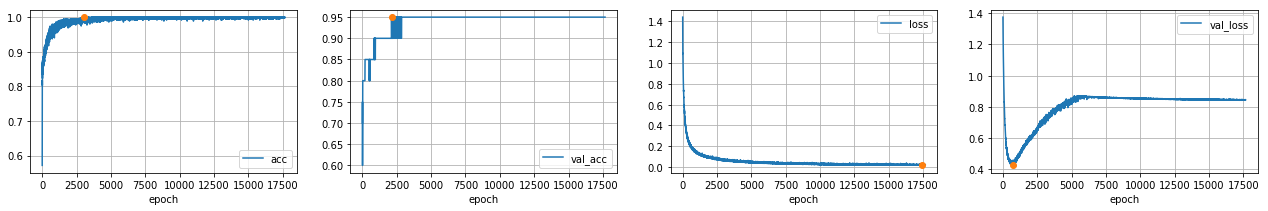

Could not load model weights


***

results/53-oxford-resnet-2-10-01/model\2018-03-13-09-59-05\weights.hdf5


,0
Autoencoder 1,results/51-oxford-autoencoder-1-10-01/model/2018-03-13-06-45-53/weights.hdf5
Autoencoder 2,results/52-oxford-autoencoder-2-10-01/model/2018-03-13-08-06-29/weights.hdf5
Batch size,20
Dataset,Oxford
Decay,1e-05
Dropout all,0.5
Epochs,100000
Fine tune,True
Layer 1,128
Layer 2,0


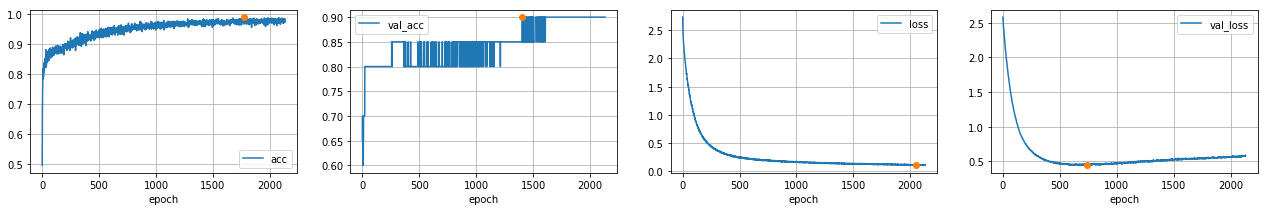

***

results/53-oxford-resnet-2-10-01/model\2018-03-13-10-05-50\weights.hdf5


,0
Autoencoder 1,results/51-oxford-autoencoder-1-10-01/model/2018-03-13-06-45-53/weights.hdf5
Autoencoder 2,results/52-oxford-autoencoder-2-10-01/model/2018-03-13-08-06-29/weights.hdf5
Batch size,20
Dataset,Oxford
Decay,1e-05
Dropout all,0.5
Epochs,100000
Fine tune,True
Layer 1,128
Layer 2,0


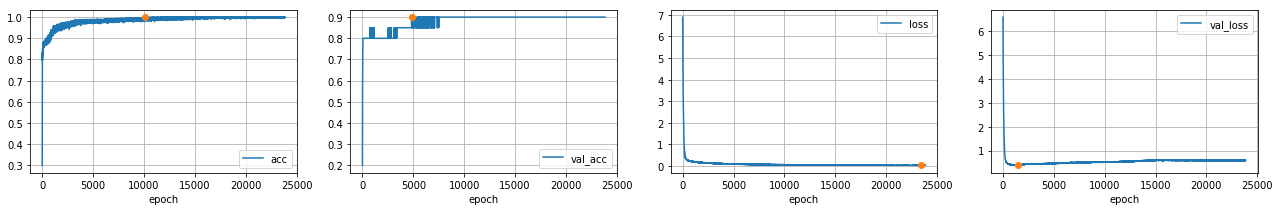

***

results/53-oxford-resnet-2-10-01/model\2018-03-13-11-21-41\weights.hdf5


,0
Autoencoder 1,results/51-oxford-autoencoder-1-10-01/model/2018-03-13-06-45-53/weights.hdf5
Autoencoder 2,results/52-oxford-autoencoder-2-10-01/model/2018-03-13-08-06-29/weights.hdf5
Batch size,20
Dataset,Oxford
Decay,1e-05
Dropout all,0.5
Epochs,100000
Fine tune,True
Layer 1,128
Layer 2,0


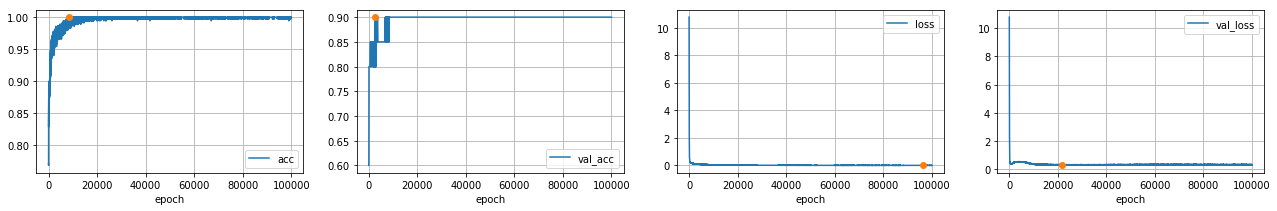

***

results/53-oxford-resnet-2-10-01/model\2018-03-13-16-34-26\weights.hdf5


,0
Autoencoder 1,results/51-oxford-autoencoder-1-10-01/model/2018-03-13-06-45-53/weights.hdf5
Autoencoder 2,results/52-oxford-autoencoder-2-10-01/model/2018-03-13-08-06-29/weights.hdf5
Batch size,20
Dataset,Oxford
Decay,1e-05
Dropout all,0.5
Epochs,100000
Fine tune,True
Layer 1,128
Layer 2,0


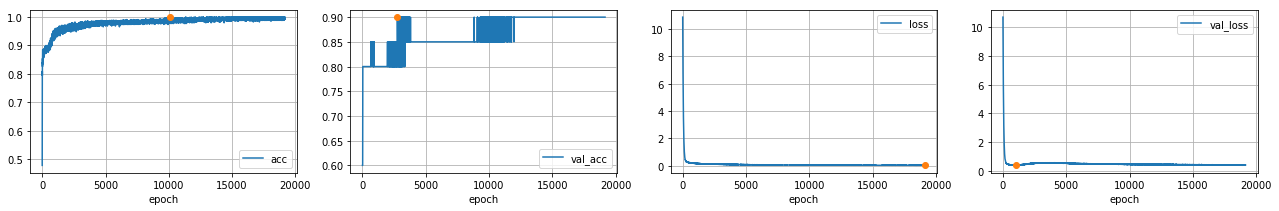

***

results/53-oxford-resnet-2-10-01/model\2018-03-13-17-34-20\weights.hdf5


,0
Autoencoder 1,results/51-oxford-autoencoder-1-10-01/model/2018-03-13-06-45-53/weights.hdf5
Autoencoder 2,results/52-oxford-autoencoder-2-10-01/model/2018-03-13-08-06-29/weights.hdf5
Batch size,20
Dataset,Oxford
Decay,1e-05
Dropout all,0.5
Epochs,100000
Fine tune,True
Layer 1,128
Layer 2,0


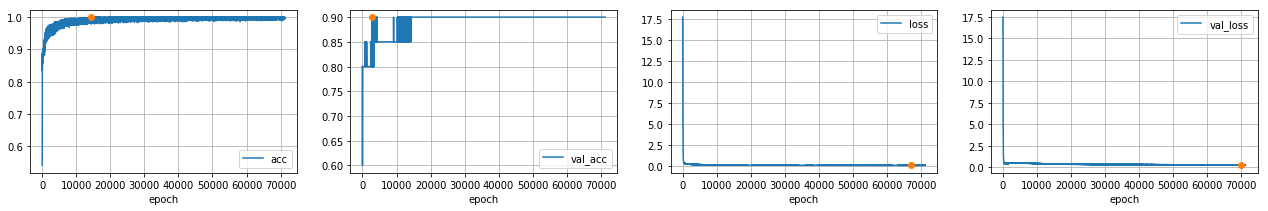

Could not load model weights


***

results/53-oxford-resnet-2-10-01/model\2018-03-13-21-46-33\weights.hdf5


,0
Autoencoder 1,results/51-oxford-autoencoder-1-10-01/model/2018-03-13-06-45-53/weights.hdf5
Autoencoder 2,results/52-oxford-autoencoder-2-10-01/model/2018-03-13-08-06-29/weights.hdf5
Batch size,20
Dataset,Oxford
Decay,1e-05
Dropout all,0.5
Epochs,100000
Fine tune,True
Layer 1,128
Layer 2,0


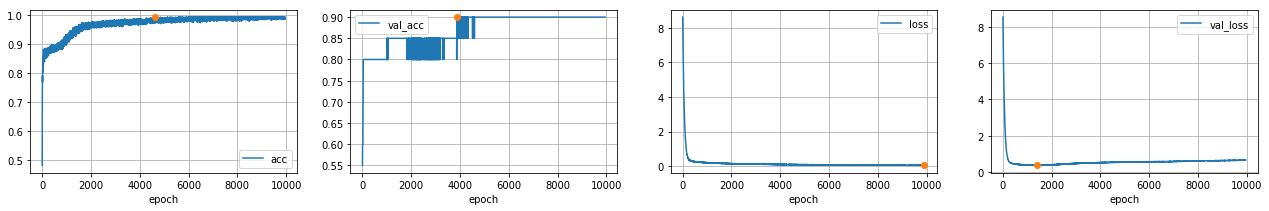

***

results/53-oxford-resnet-2-10-01/model\2018-03-13-22-15-26\weights.hdf5


,0
Autoencoder 1,results/51-oxford-autoencoder-1-10-01/model/2018-03-13-06-45-53/weights.hdf5
Autoencoder 2,results/52-oxford-autoencoder-2-10-01/model/2018-03-13-08-06-29/weights.hdf5
Batch size,20
Dataset,Oxford
Decay,1e-05
Dropout all,0.5
Epochs,100000
Fine tune,True
Layer 1,128
Layer 2,0


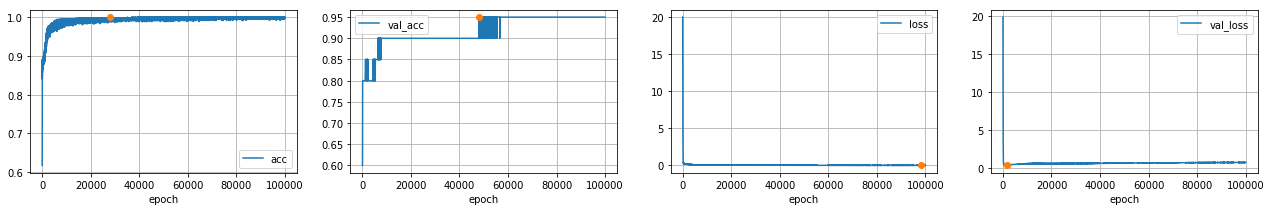

Could not load model weights


***

results/53-oxford-resnet-2-10-01/model\2018-03-14-03-13-44\weights.hdf5


,0
Autoencoder 1,results/51-oxford-autoencoder-1-10-01/model/2018-03-13-06-45-53/weights.hdf5
Autoencoder 2,results/52-oxford-autoencoder-2-10-01/model/2018-03-13-08-06-29/weights.hdf5
Batch size,20
Dataset,Oxford
Decay,1e-05
Dropout all,0.5
Epochs,100000
Fine tune,True
Layer 1,128
Layer 2,0


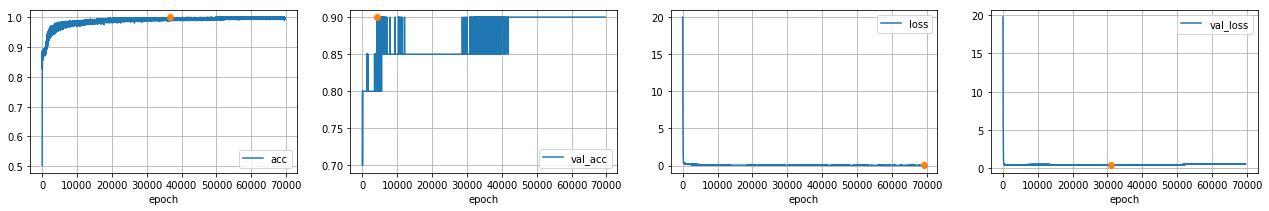

In [5]:
i = 1
for file_name in param_files:
    epoch_file_name = file_name + "epochs.csv"
    param_file_name = file_name + "params.csv"
    model_file_name = file_name + "weights.hdf5"
    epochs = pd.read_csv(epoch_file_name)
    params = pd.read_csv(param_file_name, index_col=0)
    params['Directory'] = file_name
    params['Max acc'] = get_row_extreme(epochs, 'acc', True)['acc']
    params['Max val_acc'] = get_row_extreme(epochs, 'val_acc', True)['val_acc']
    params['Min loss'] = get_row_extreme(epochs, 'loss', False)['loss']
    params['Min val_loss'] = get_row_extreme(epochs, 'val_loss', False)['val_loss']
    
    try:
        model = load_model(model_file_name)
        y_pred = model.predict(x_test)
        tn, fp, fn, tp = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)).ravel()
        params['AR'] = (tp+tn)/(tp+fp+tn+fn)
        params['SE'] = tp/(tp+fn)
        params['SP'] = tn/(fp+tn)
    except:
        print('Could not load model weights')
    
    display(Markdown('***'))
    print(model_file_name)
    display(params.transpose())
    
    # Plot all the epochs.
    plt.figure(1, figsize=(22,3))
    plt.subplot(1,4,1)
    epochs.plot(x='epoch', y='acc', ax=plt.gca())
    highlight_extreme(epochs, 'acc', plt, True)
    plt.grid(True)
    plt.subplot(1,4,2)
    epochs.plot(x='epoch', y='val_acc', ax=plt.gca())
    highlight_extreme(epochs, 'val_acc', plt, True)
    plt.grid(True)
    plt.subplot(1,4,3)
    epochs.plot(x='epoch', y='loss', ax=plt.gca())
    highlight_extreme(epochs, 'loss', plt, False)
    plt.grid(True)
    plt.subplot(1,4,4)
    epochs.plot(x='epoch', y='val_loss', ax=plt.gca())
    highlight_extreme(epochs, 'val_loss', plt, False)
    plt.grid(True)
    plt.show()
    i = i+1